In [1]:
import numpy as np

import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'xx-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize,
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2
import plotter

In [2]:
statistic = 'xi'
testtag = ''
res_dir = '../../clust/results_{}'.format(statistic)
testing_dir = '{}/testing_{}{}/'.format(res_dir, statistic, testtag)
testid = 0
CID_fid = 2
HID_fid = 3
boxid_fid = 0
idtag_fid = "cosmo_{}_Box_{}_HOD_{}_test_{}".format(CID_fid, boxid_fid, HID_fid, testid)
rads, vals_fid = np.loadtxt(testing_dir + "{}_{}.dat".format(statistic, idtag_fid),
                                                  delimiter=',', unpack=True)

Text(0, 0.5, '$\\xi_0(r)$')

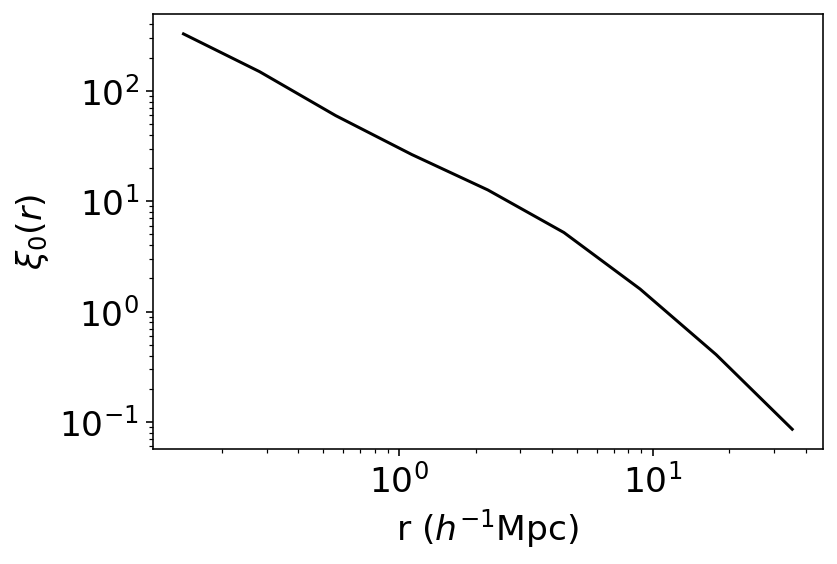

In [3]:
plt.plot(rads, vals_fid, color='k')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"r ($h^{-1}$Mpc)")
plt.ylabel(r"$\xi_0(r)$")

Text(0, 0.5, 'r$^2$ $\\xi_0(r)$')

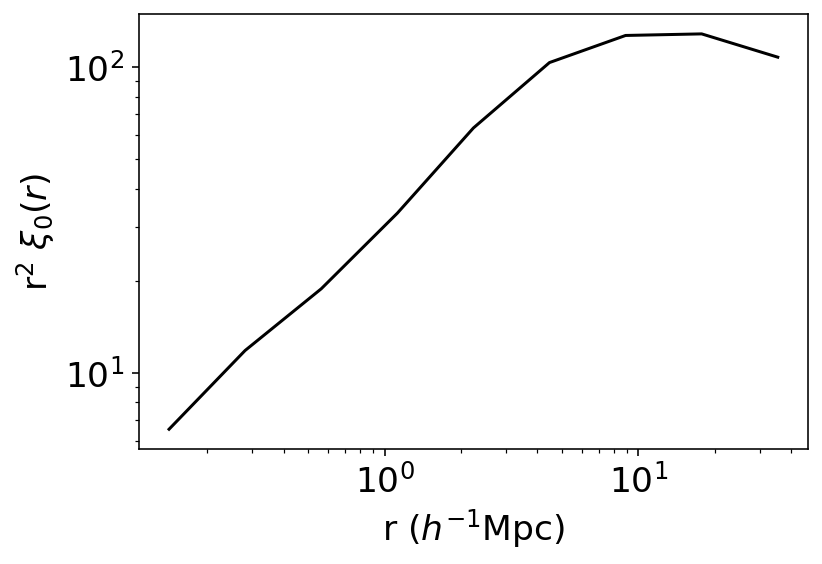

In [4]:
plt.plot(rads, rads**2 * vals_fid, color='k')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"r ($h^{-1}$Mpc)")
plt.ylabel(r"r$^2$ $\xi_0(r)$")

In [5]:
statistic = 'xi2'
testtag = ''
res_dir = '../../clust/results_{}'.format(statistic)
testing_dir = '{}/testing_{}{}/'.format(res_dir, statistic, testtag)
testid = 0
CID_fid = 2
HID_fid = 3
boxid_fid = 0
idtag_fid = "cosmo_{}_Box_{}_HOD_{}_test_{}".format(CID_fid, boxid_fid, HID_fid, testid)
rads, vals_fid = np.loadtxt(testing_dir + "{}_{}.dat".format(statistic, idtag_fid),
                                                  delimiter=',', unpack=True)

Text(0, 0.5, '$\\xi_2(r)$')

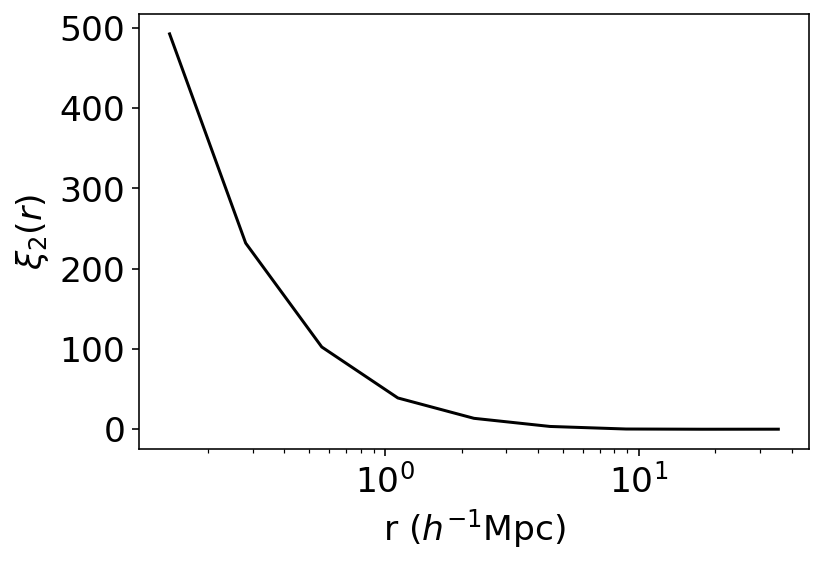

In [6]:
plt.plot(rads, vals_fid, color='k')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r"r ($h^{-1}$Mpc)")
plt.ylabel(r"$\xi_2(r)$")

Text(0, 0.5, 'r$^2$ $\\xi_2(r)$')

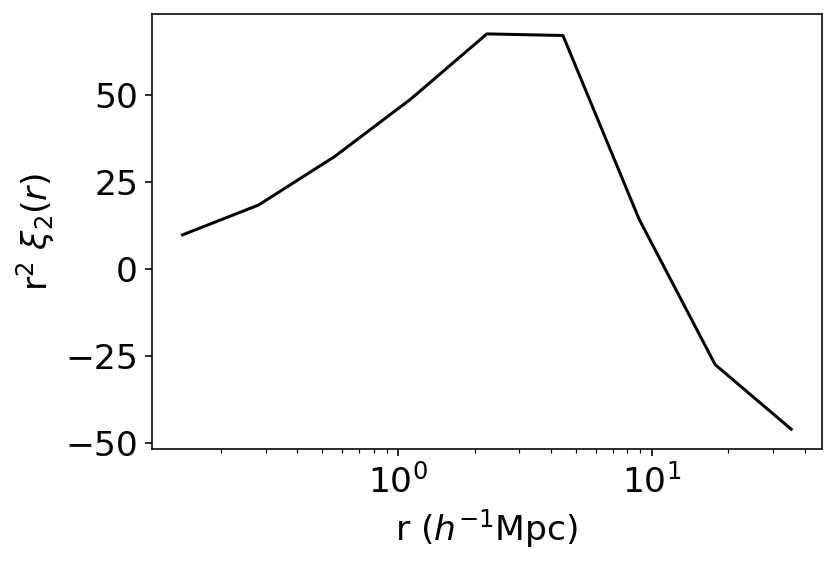

In [7]:
plt.plot(rads, rads**2 * vals_fid, color='k')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r"r ($h^{-1}$Mpc)")
plt.ylabel(r"r$^2$ $\xi_2(r)$")

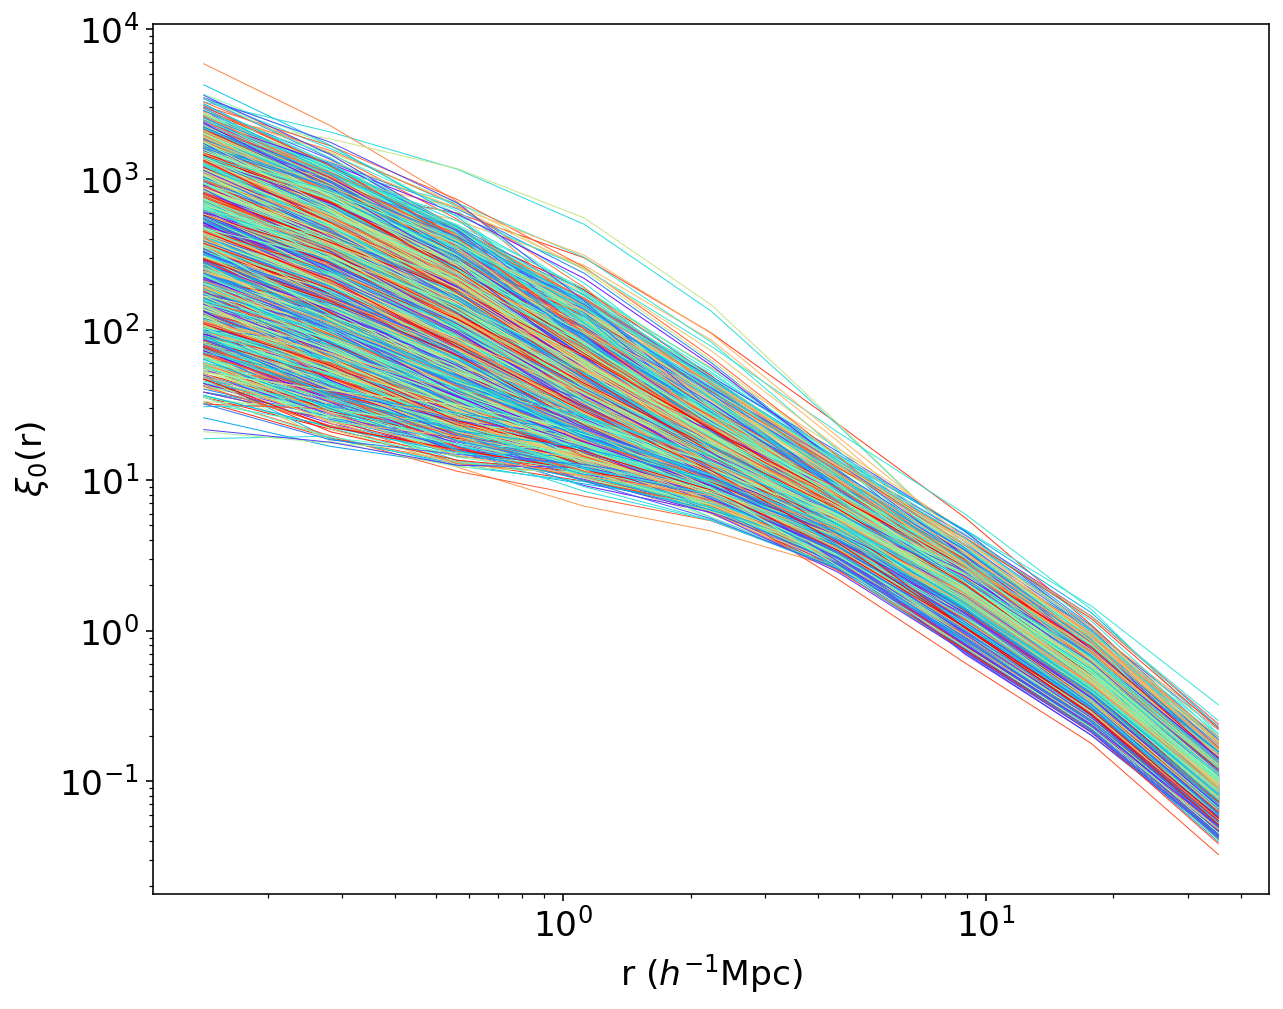

In [8]:
statistic='xi'
traintag = '_nonolap'
res_dir = '../../clust/results_{}'.format(statistic)
data_dir = f'{res_dir}/training_{statistic}{traintag}'
plotter.plot_training(statistic, res_dir, data_dir)

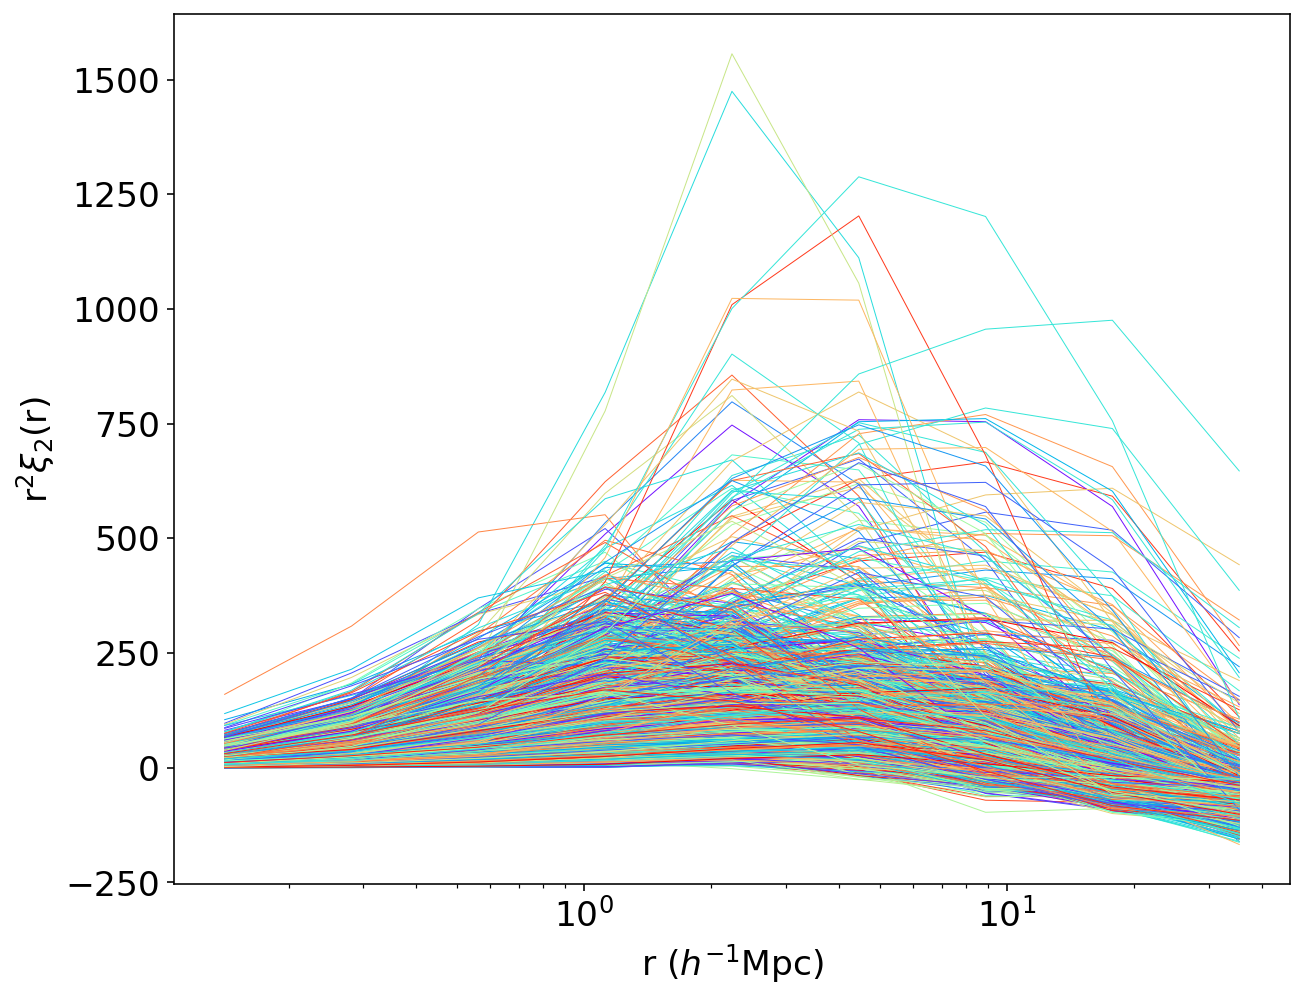

In [10]:
statistic='xi2'
traintag = '_nonolap'
res_dir = '../../clust/results_{}'.format(statistic)
data_dir = f'{res_dir}/training_{statistic}{traintag}'
plotter.plot_training(statistic, res_dir, data_dir, xrsq=True)

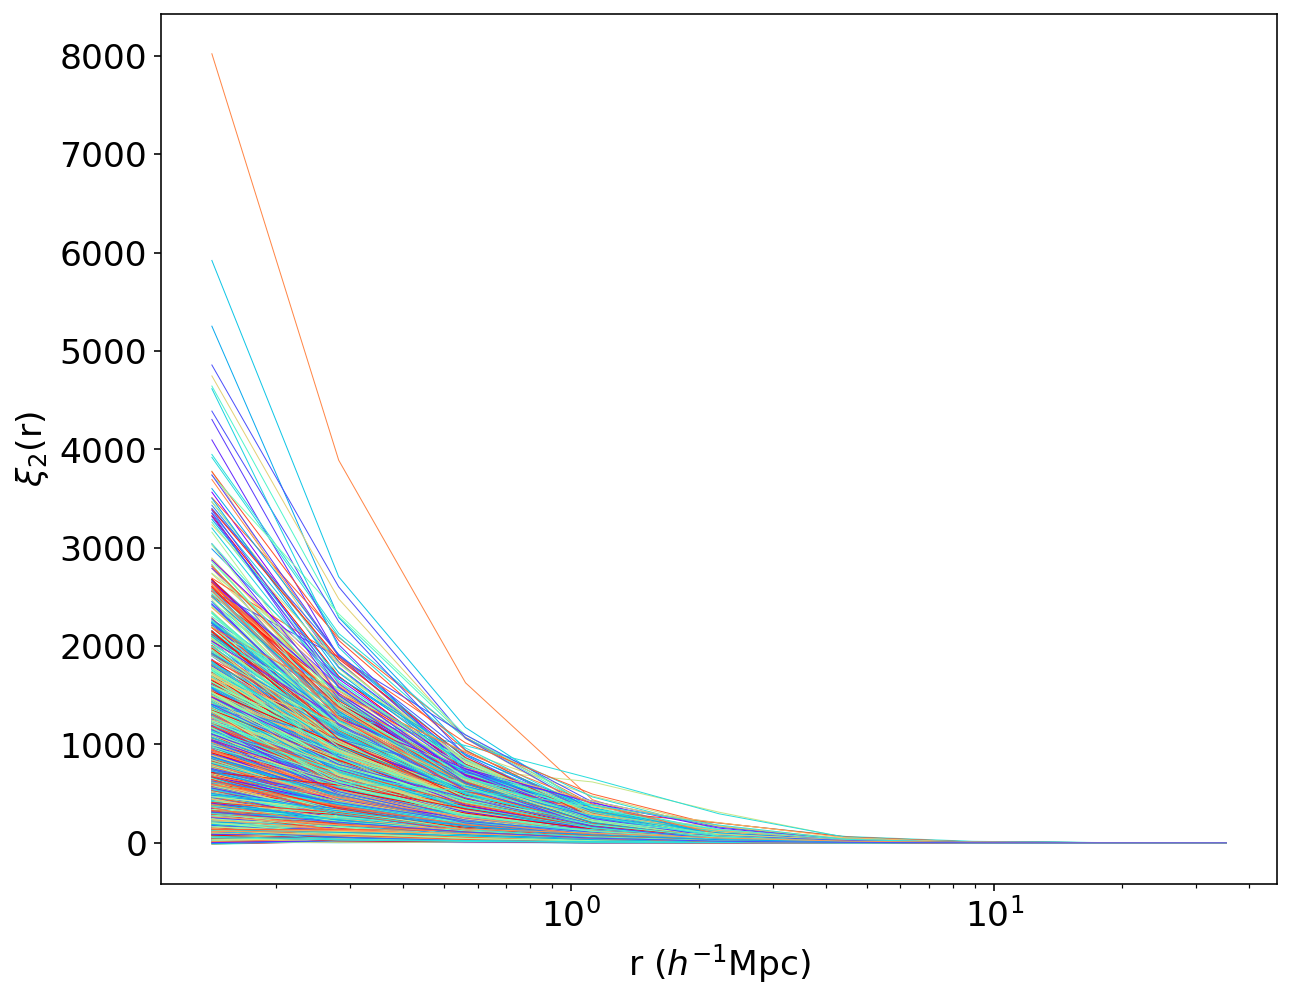

In [11]:
statistic='xi2'
traintag = '_nonolap'
res_dir = '../../clust/results_{}'.format(statistic)
data_dir = f'{res_dir}/training_{statistic}{traintag}'
plotter.plot_training(statistic, res_dir, data_dir)

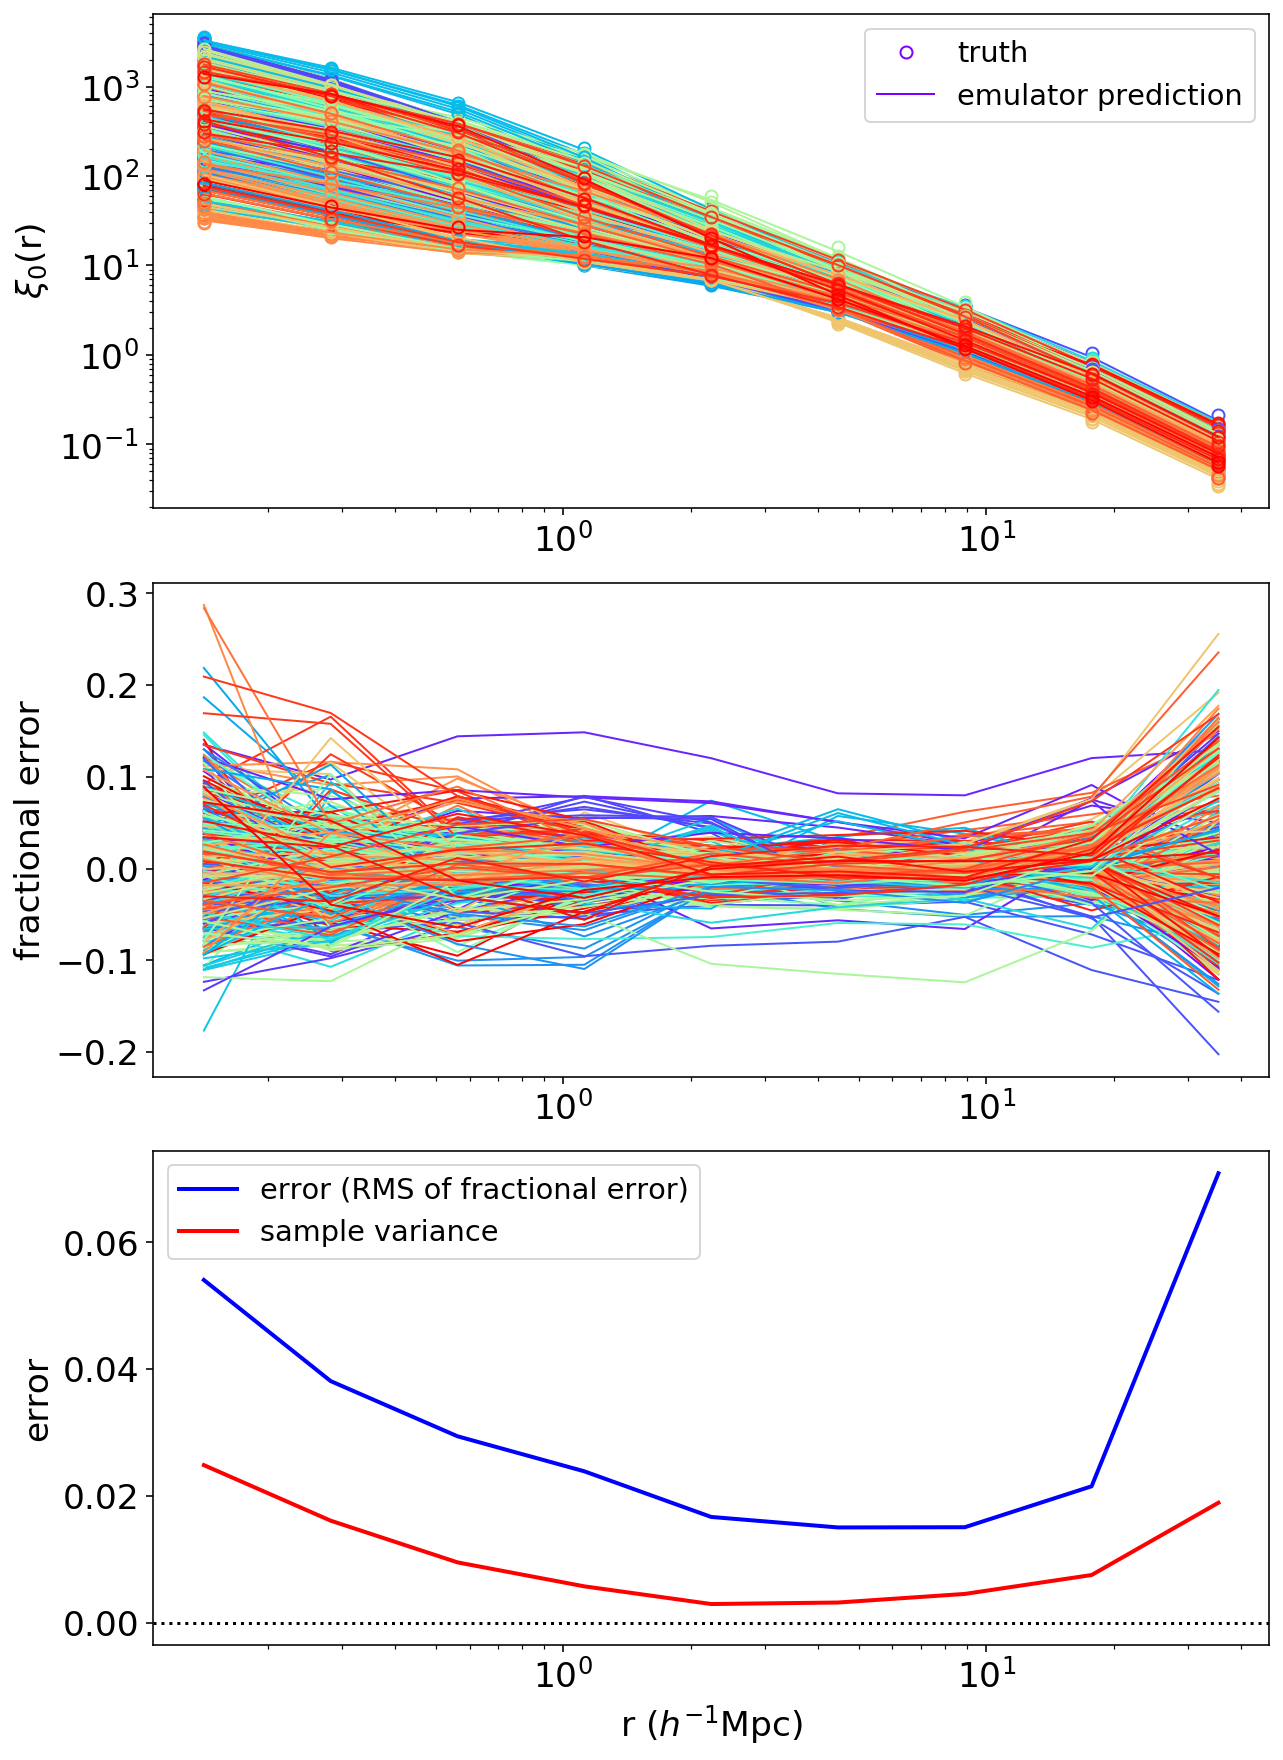

In [12]:
statistic='xi'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_hod3_test0'
nhod = 100
kernel_name = 'M32ExpConst'
savetag = ''

tag = '_log_k{}_{}hod'.format(kernel_name, nhod)
gptag = traintag + errtag + tag
acctag = gptag + testtag + savetag
plotter.plot_accuracy(statistic, testtag, acctag, errtag)

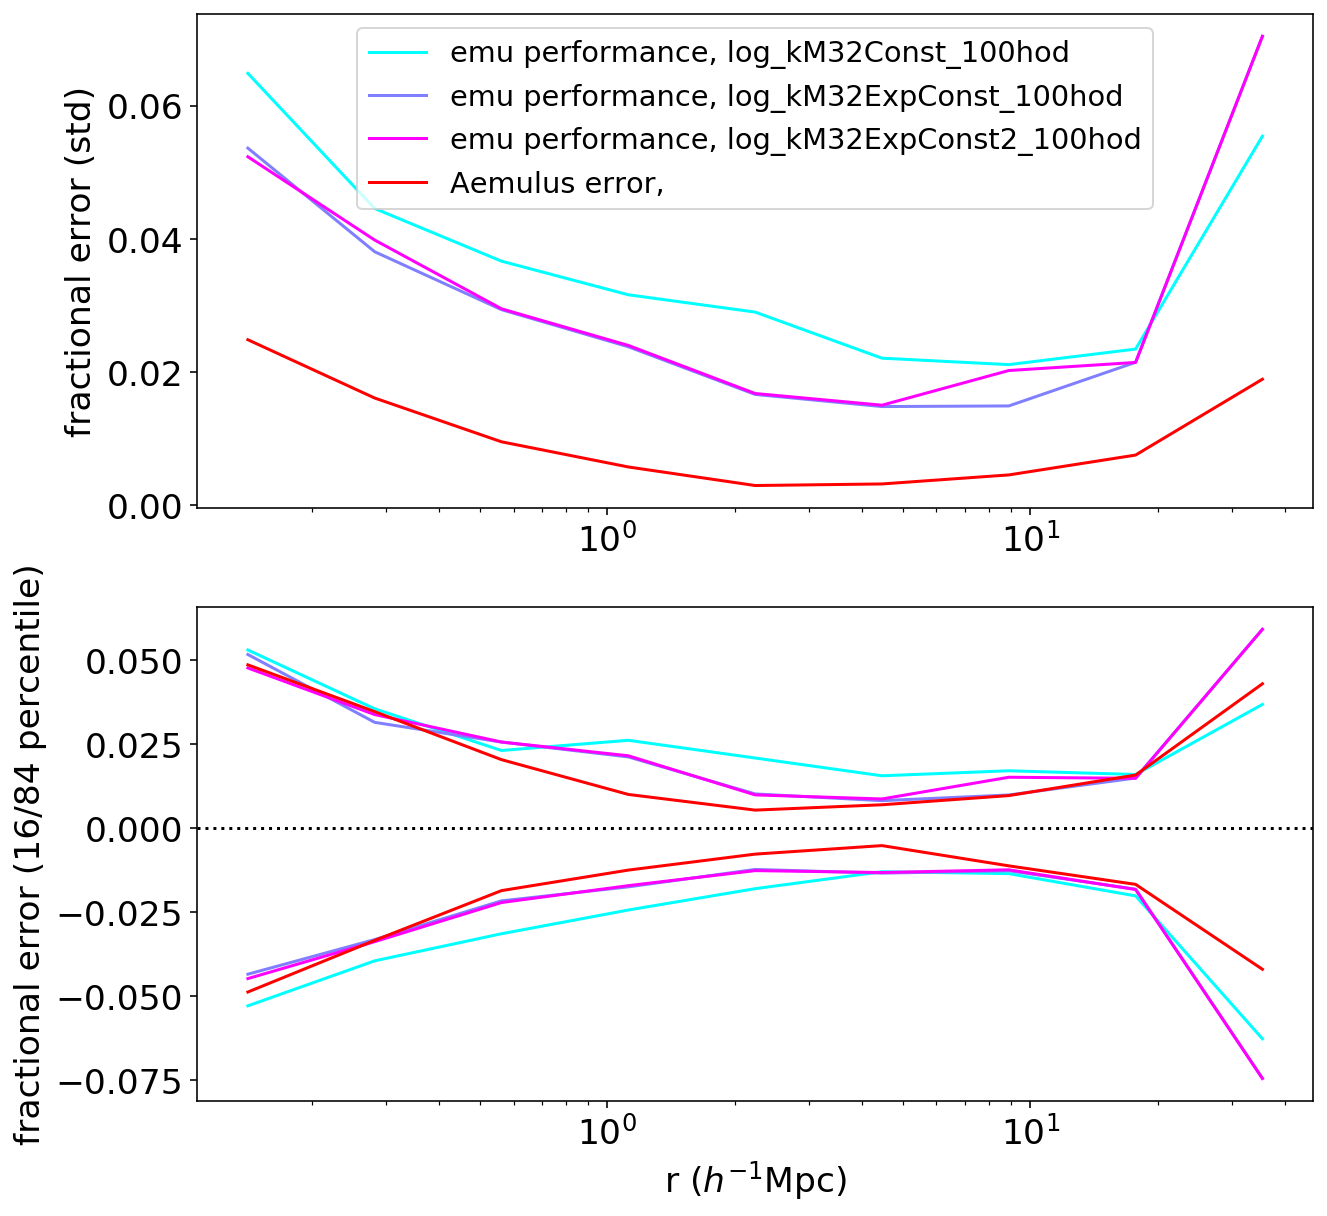

In [13]:
statistic='xi'

tags = ['_log_kM32Const_100hod', '_log_kM32ExpConst_100hod', '_log_kM32ExpConst2_100hod']

errtag = '_hod3_test0'
traintags = ['_nonolap']*len(tags)
testtags = ['_mean_test0']*len(tags)
labels = [f'emu performance, {s[1:]}' for s in tags]

acctags = []
for i in range(len(tags)):
    gptag = traintags[i] + errtag + tags[i]
    acctag = gptag + testtags[i]
    acctags.append(acctag)

plotter.compare_emulators(statistic, testtags, acctags, errtag, savetag, labels=labels)

The difference in "sample variance" line in compare_emulators and plot_accuracy is that in the latter, we are multiplying by 1/5 because we are comparing to the means.
Should we be doing this in compare_emus?

[-1.94020668e-01 -1.26007054e-01 -1.98137983e-02  5.30362236e-02
  4.67348411e-01  1.26389998e+01 -1.68197701e-01 -9.77257911e-02
 -6.07348601e-03]
[-3.78112271e-02 -2.61482477e-02  2.51179140e-03  3.94705318e-02
  2.40134142e-01  1.43442078e+04 -6.17054238e-02  2.75148099e-02
 -1.12485490e-01]
[ 0.16794736  0.5469538   0.39936026  0.53314031  0.58257974 10.3606706
 -0.15713838 -0.07361372  0.12267625]
[6.96991991e-01 9.82617473e-01 1.54136197e+00 1.39264880e+00
 4.78573433e-01 3.27718030e+02 7.17370316e-01 3.29866835e-01
 2.39400205e-01]
[ 1.80511764  0.65840329  1.12549614  1.08827067  0.27135505 43.92755486
 -0.1538847   0.05211865 -0.05216023]
[-0.22514341 -0.06664428 -0.11568543 -0.09812877 -0.17444934 27.16608394
  0.31651043  0.10571479  0.11444912]
[ 0.38787823  1.33771479  0.982707    0.68577215  0.41682756 22.78223301
  0.86089014  0.31973238  0.06018303]
[ 2.45058117  0.84024229  0.39888579  0.13965229 -0.12728926 13.19201838
 -0.15739982  0.06469756 -0.16341372]
[ 8.7585488

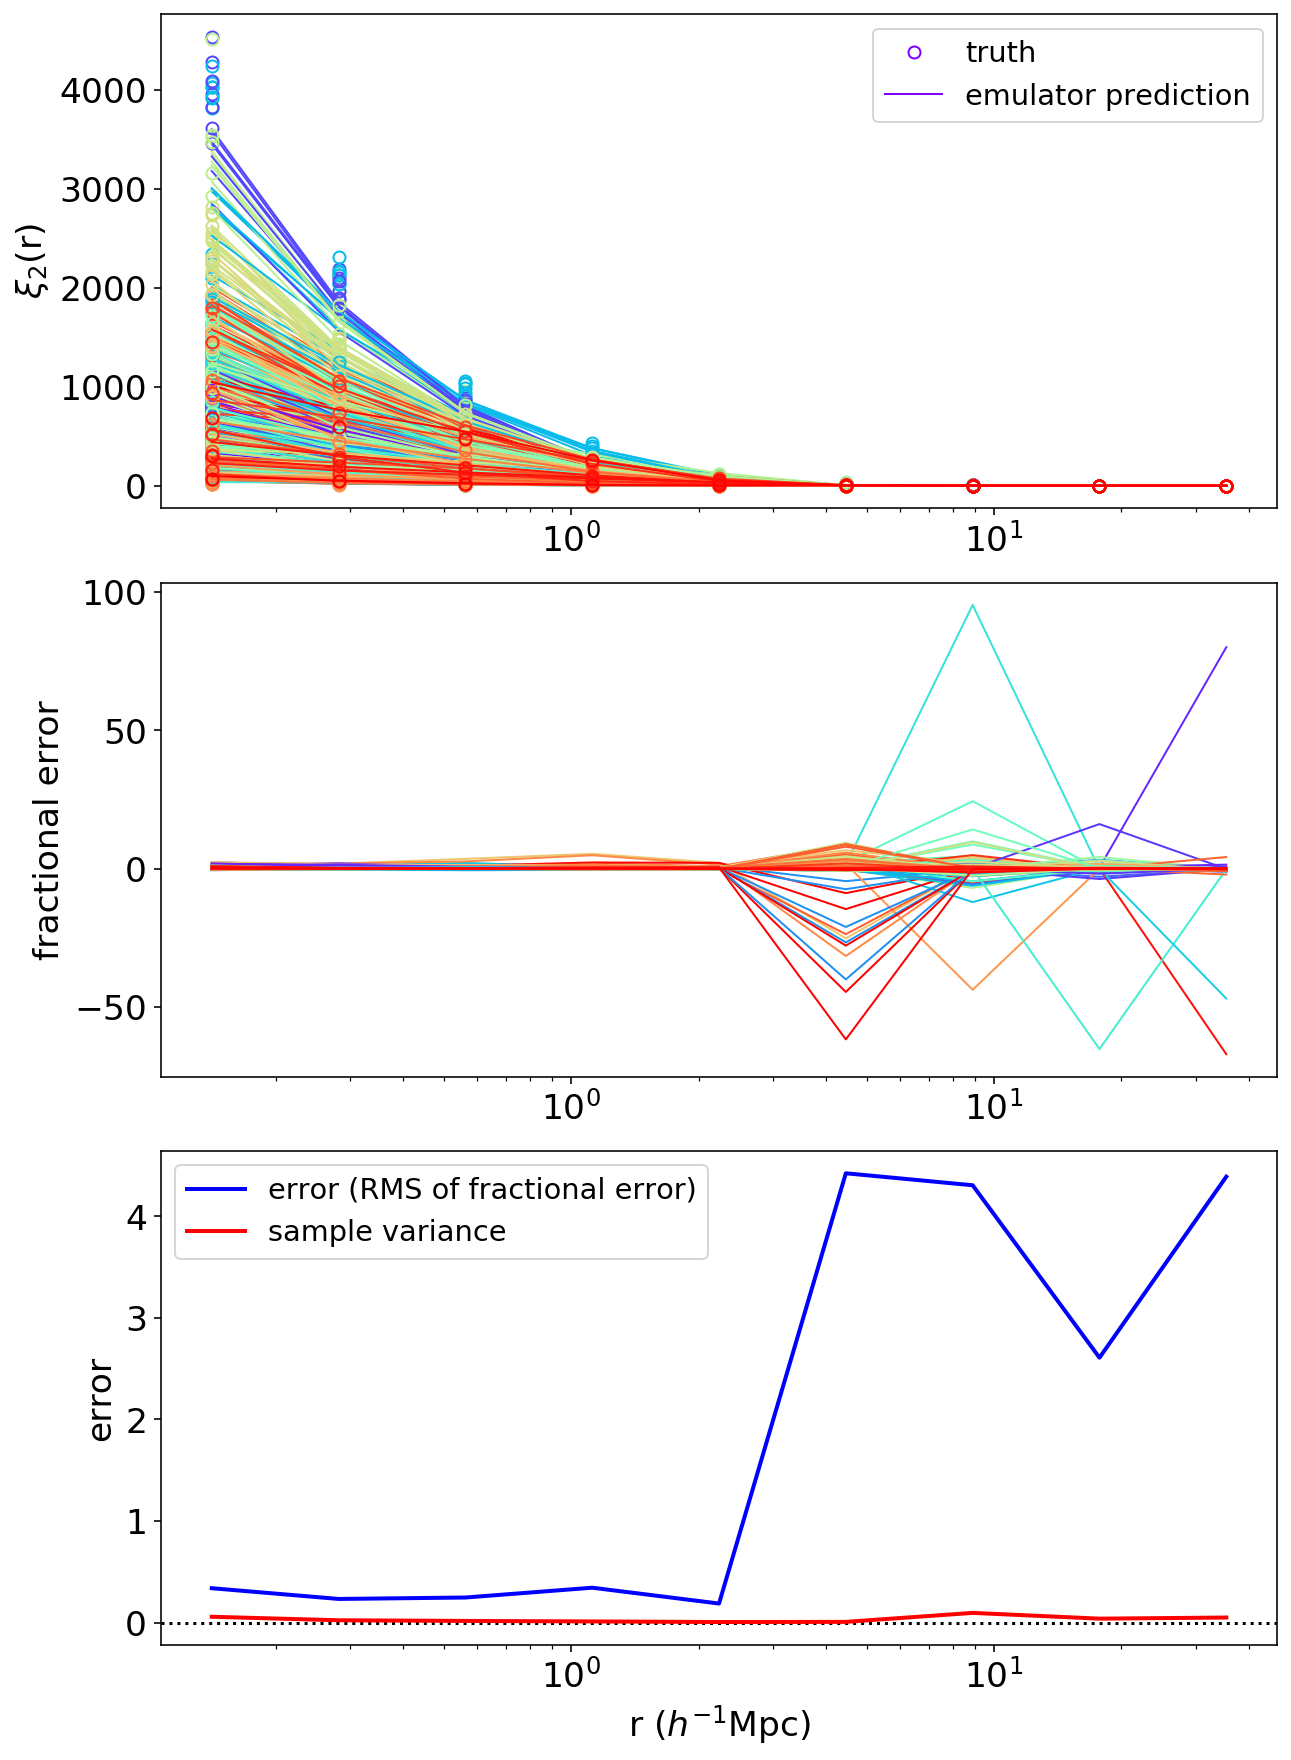

In [14]:
statistic='xi2'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_hod3_test0'
nhod = 100
kernel_name = 'M32Const'
savetag = ''

tag = '_k{}_{}hod'.format(kernel_name, nhod)
gptag = traintag + errtag + tag
acctag = gptag + testtag + savetag
plotter.plot_accuracy(statistic, testtag, acctag, errtag)

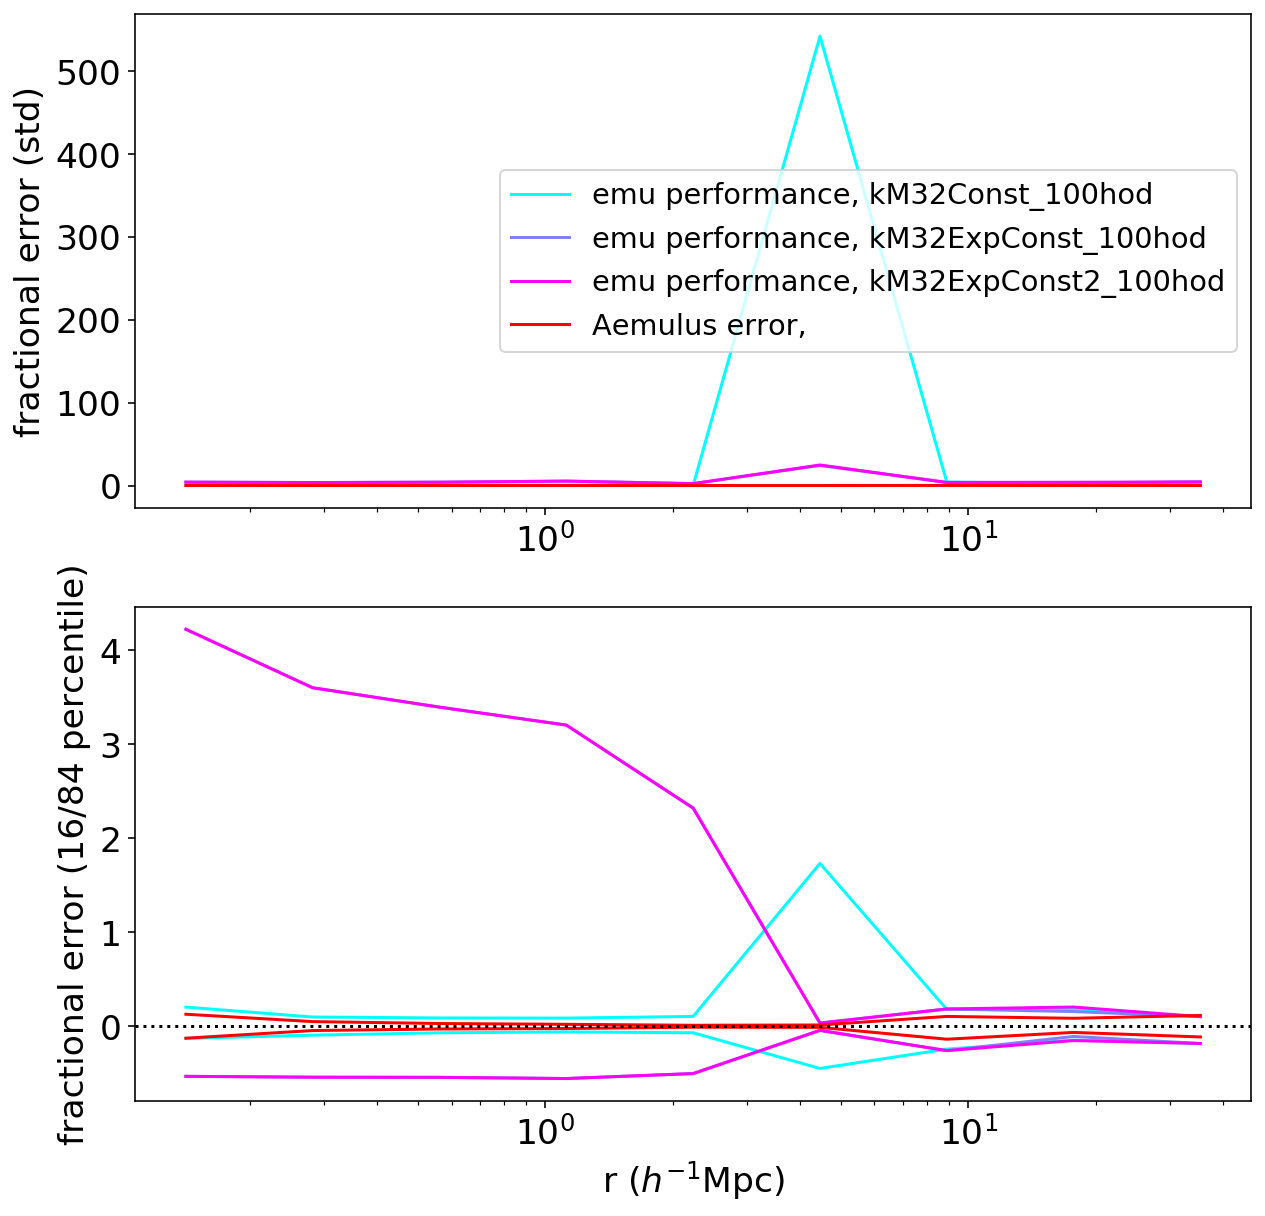

In [15]:
statistic='xi2'

tags = ['_kM32Const_100hod', '_kM32ExpConst_100hod', '_kM32ExpConst2_100hod']
savetag = ''
errtag = '_hod3_test0'
traintags = ['_nonolap']*len(tags)
testtags = ['_mean_test0']*len(tags)
labels = [f'emu performance, {s[1:]}' for s in tags]

acctags = []
for i in range(len(tags)):
    gptag = traintags[i] + errtag + tags[i]
    acctag = gptag + testtags[i]
    acctags.append(acctag)

plotter.compare_emulators(statistic, testtags, acctags, errtag, savetag, labels=labels)

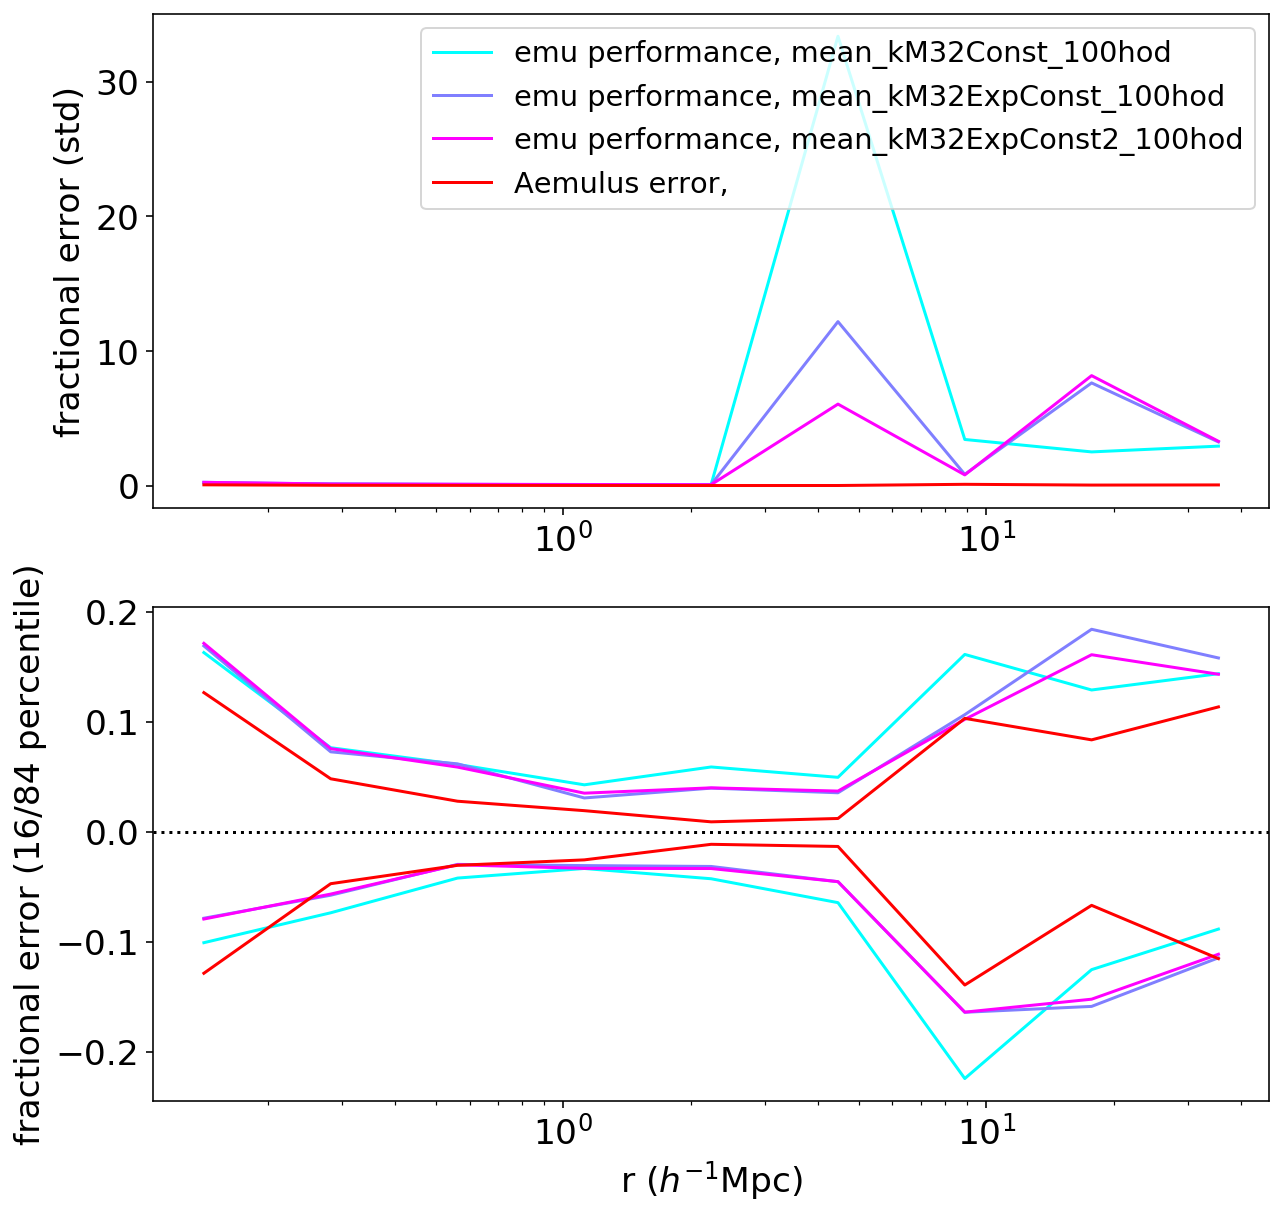

In [16]:
statistic='xi2'

tags = ['_mean_kM32Const_100hod', '_mean_kM32ExpConst_100hod', '_mean_kM32ExpConst2_100hod']
savetag = ''
errtag = '_hod3_test0'
traintags = ['_nonolap']*len(tags)
testtags = ['_mean_test0']*len(tags)
labels = [f'emu performance, {s[1:]}' for s in tags]

acctags = []
for i in range(len(tags)):
    gptag = traintags[i] + errtag + tags[i]
    acctag = gptag + testtags[i]
    acctags.append(acctag)

plotter.compare_emulators(statistic, testtags, acctags, errtag, savetag, labels=labels)

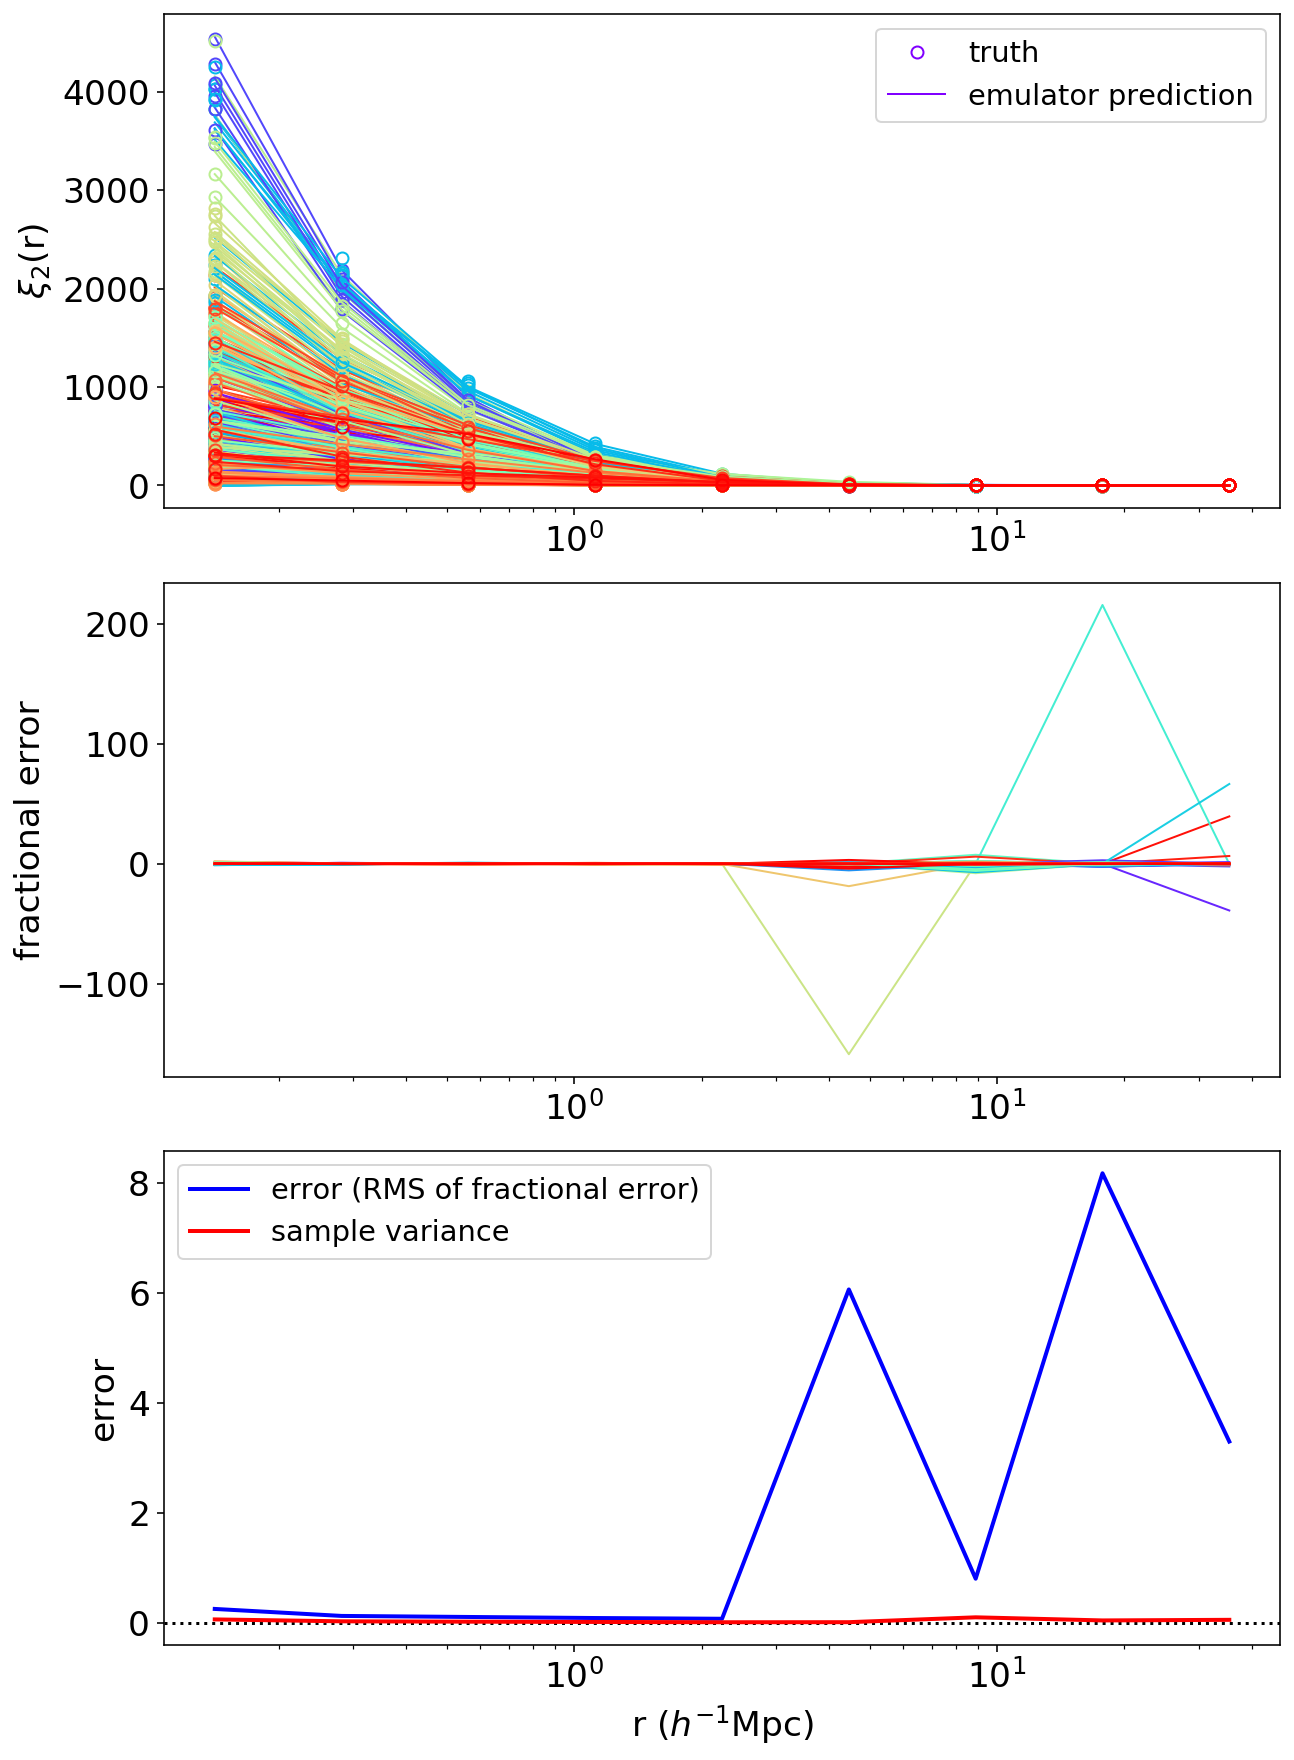

In [17]:
statistic='xi2'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_hod3_test0'
nhod = 100
kernel_name = 'M32ExpConst2'
savetag = ''

tag = '_mean_k{}_{}hod'.format(kernel_name, nhod)
gptag = traintag + errtag + tag
acctag = gptag + testtag + savetag
plotter.plot_accuracy(statistic, testtag, acctag, errtag)

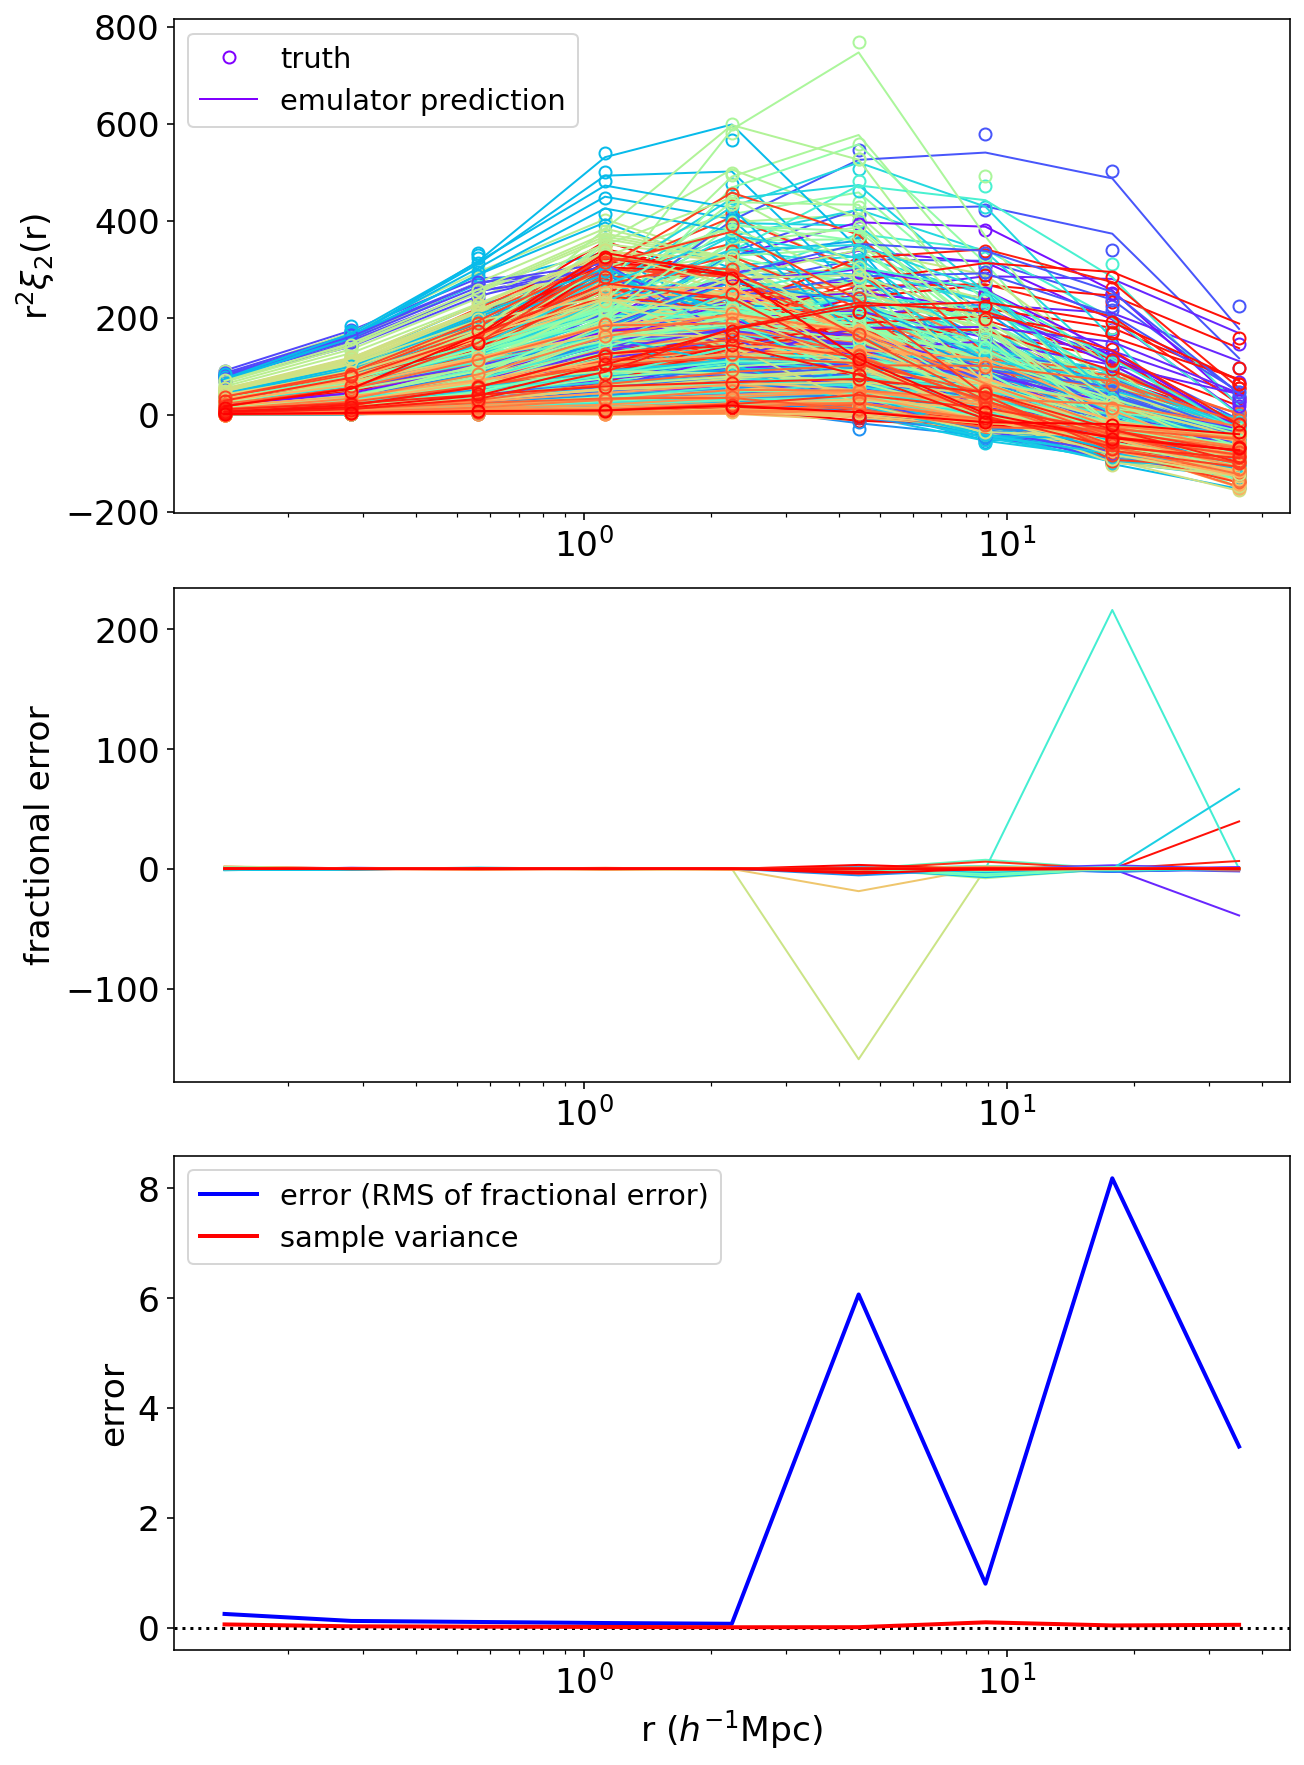

In [18]:
statistic='xi2'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_hod3_test0'
nhod = 100
kernel_name = 'M32ExpConst2'
savetag = ''

tag = '_mean_k{}_{}hod'.format(kernel_name, nhod)
gptag = traintag + errtag + tag
acctag = gptag + testtag + savetag
plotter.plot_accuracy(statistic, testtag, acctag, errtag, xrsq=True)

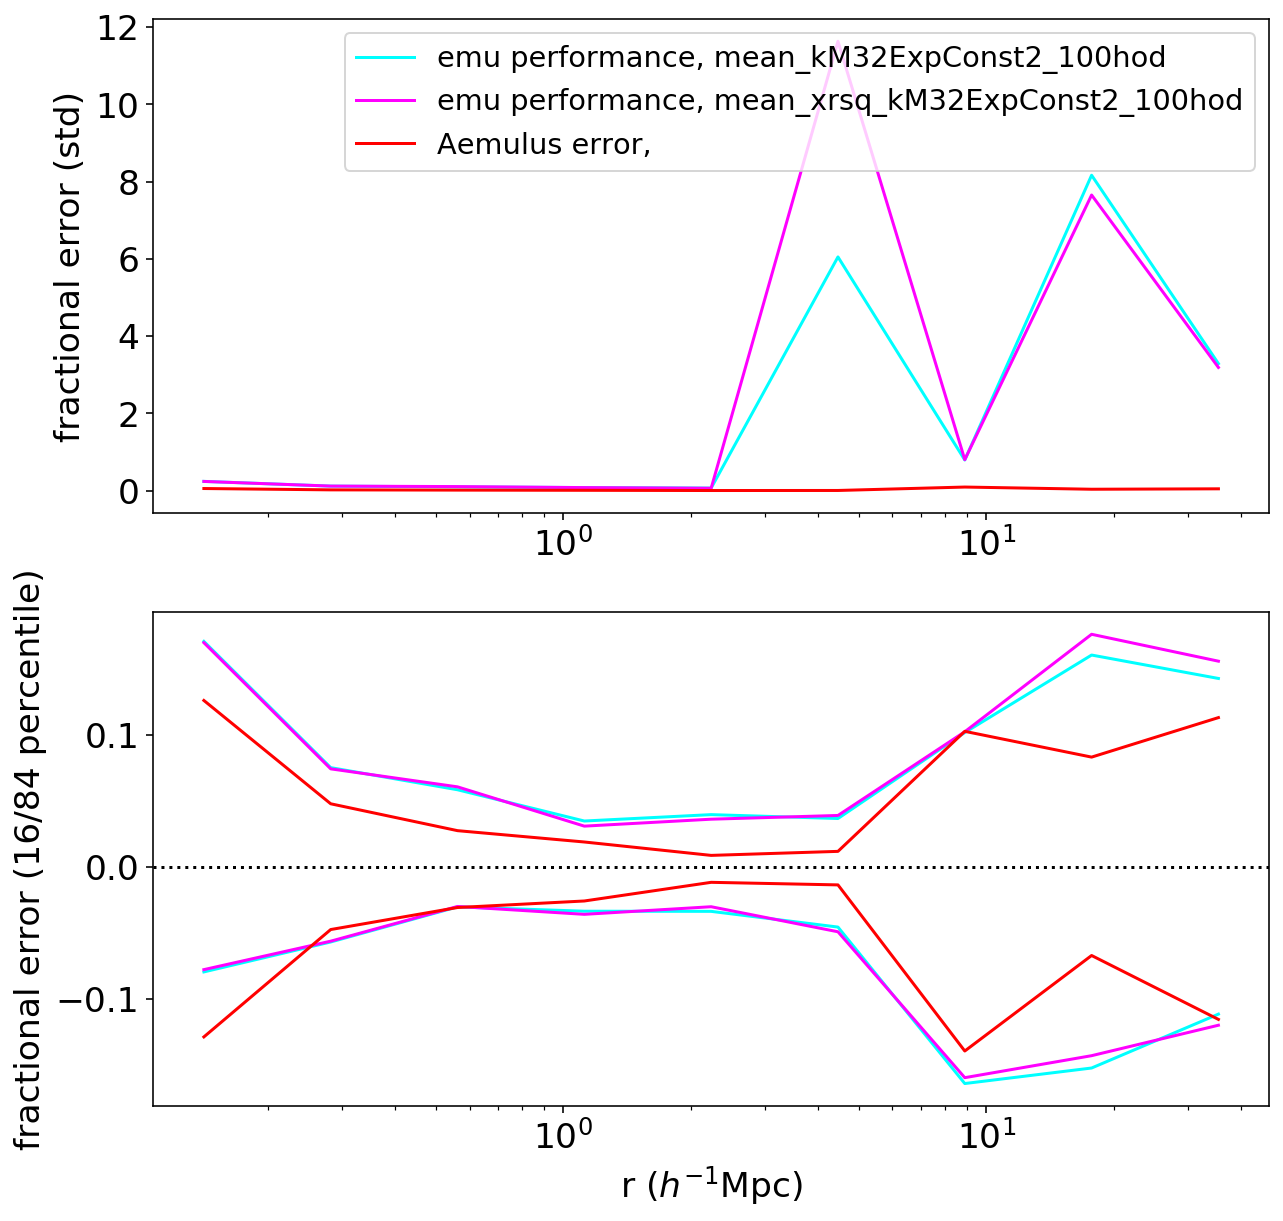

In [19]:
statistic='xi2'

tags = ['_mean_kM32ExpConst2_100hod', '_mean_xrsq_kM32ExpConst2_100hod']#,
       #'_meansub_xrsq_kM32ExpConst2_100hod']#, '_meansub_kM32ExpConst2_100hod']
savetag = ''
errtag = '_hod3_test0'
traintags = ['_nonolap']*len(tags)
testtags = ['_mean_test0']*len(tags)
labels = [f'emu performance, {s[1:]}' for s in tags]

acctags = []
for i in range(len(tags)):
    gptag = traintags[i] + errtag + tags[i]
    acctag = gptag + testtags[i]
    acctags.append(acctag)

plotter.compare_emulators(statistic, testtags, acctags, errtag, savetag, labels=labels)

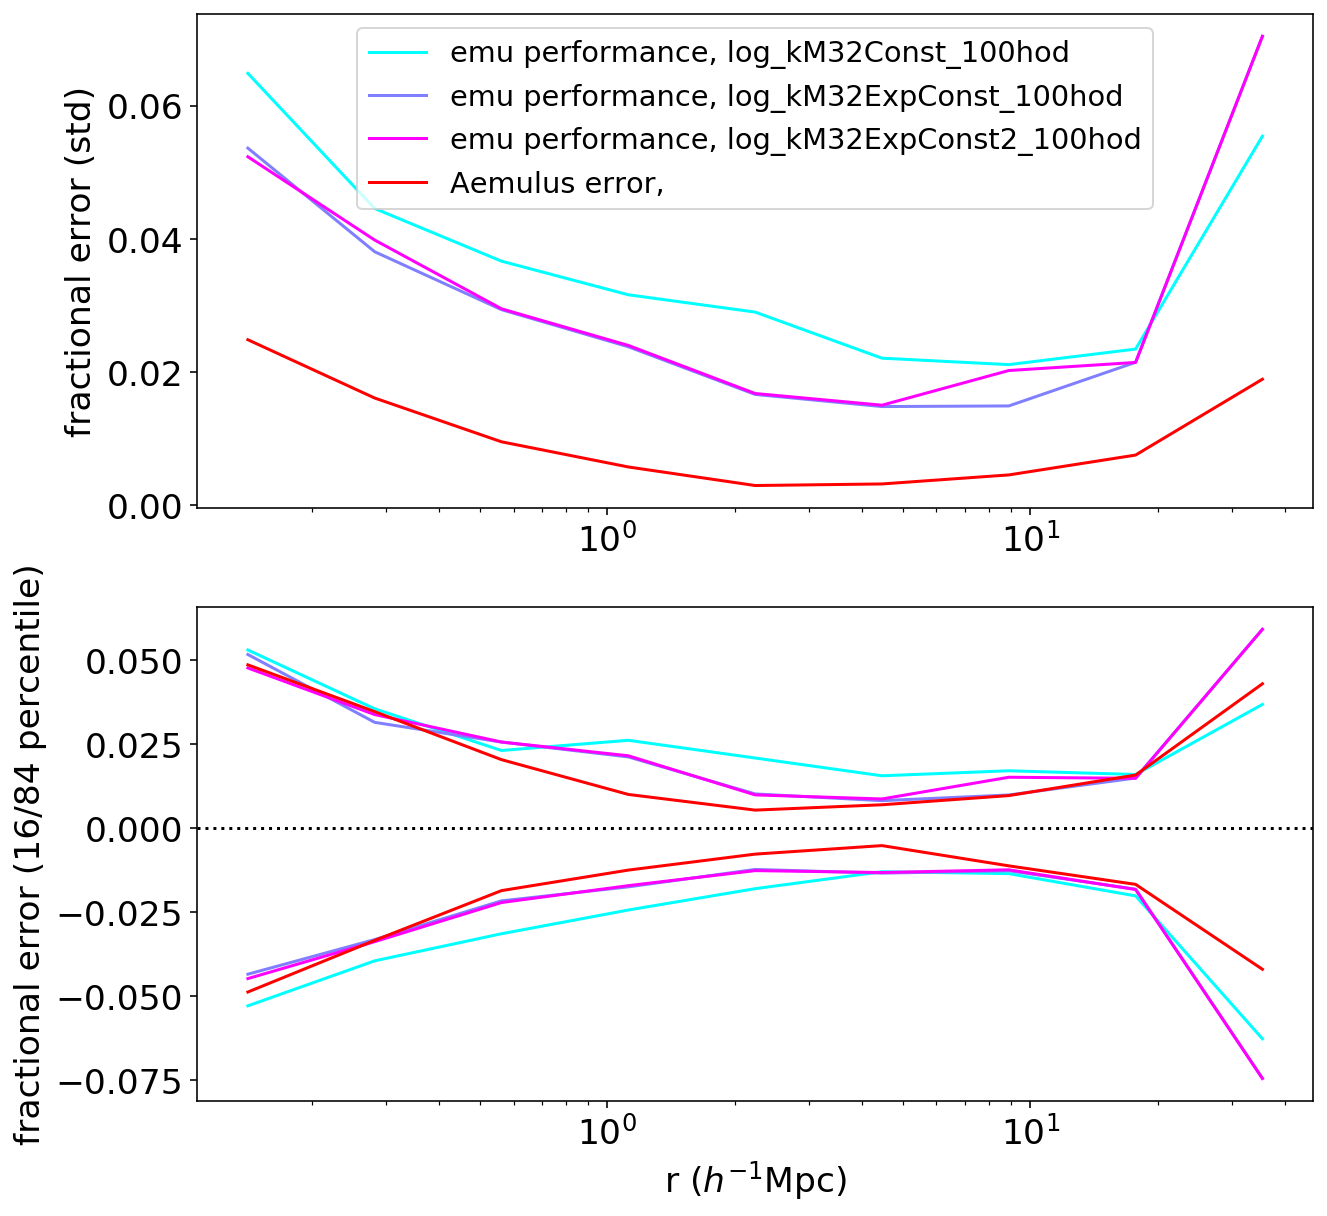

In [8]:
statistic='xi'

# tags = ['_log_kM32ExpConst2_100hod', '_log_xrsq_kM32ExpConst2_100hod', '_log_mean_xrsq_kM32ExpConst2_100hod',
#        '_mean_log_kM32ExpConst2_100hod', '_meansub_log_kM32ExpConst2_100hod',
#        '_mean_log_xrsq_kM32ExpConst2_100hod', '_meansub_log_xrsq_kM32ExpConst2_100hod']
tags = ['_log_kM32Const_100hod',
        '_log_kM32ExpConst_100hod',
        '_log_kM32ExpConst2_100hod']
#         '_log_xrsq_kM32ExpConst2_100hod', 
#         '_log_mean_xrsq_kM32ExpConst2_100hod',
#         '_log_xrsq_kM32ExpConst2_100hod']
#         '_mean_log_kM32ExpConst2_100hod',
#         '_meansub_log_kM32ExpConst2_100hod',
#         '_mean_log_xrsq_kM32ExpConst2_100hod', 
#         '_meansub_log_xrsq_kM32ExpConst2_100hod']
savetag = ''
errtag = '_hod3_test0'
traintags = ['_nonolap']*len(tags)
testtags = ['_mean_test0']*len(tags)
labels = [f'emu performance, {s[1:]}' for s in tags]

acctags = []
for i in range(len(tags)):
    gptag = traintags[i] + errtag + tags[i]
    acctag = gptag + testtags[i]
    acctags.append(acctag)

plotter.compare_emulators(statistic, testtags, acctags, errtag, savetag, labels=labels)

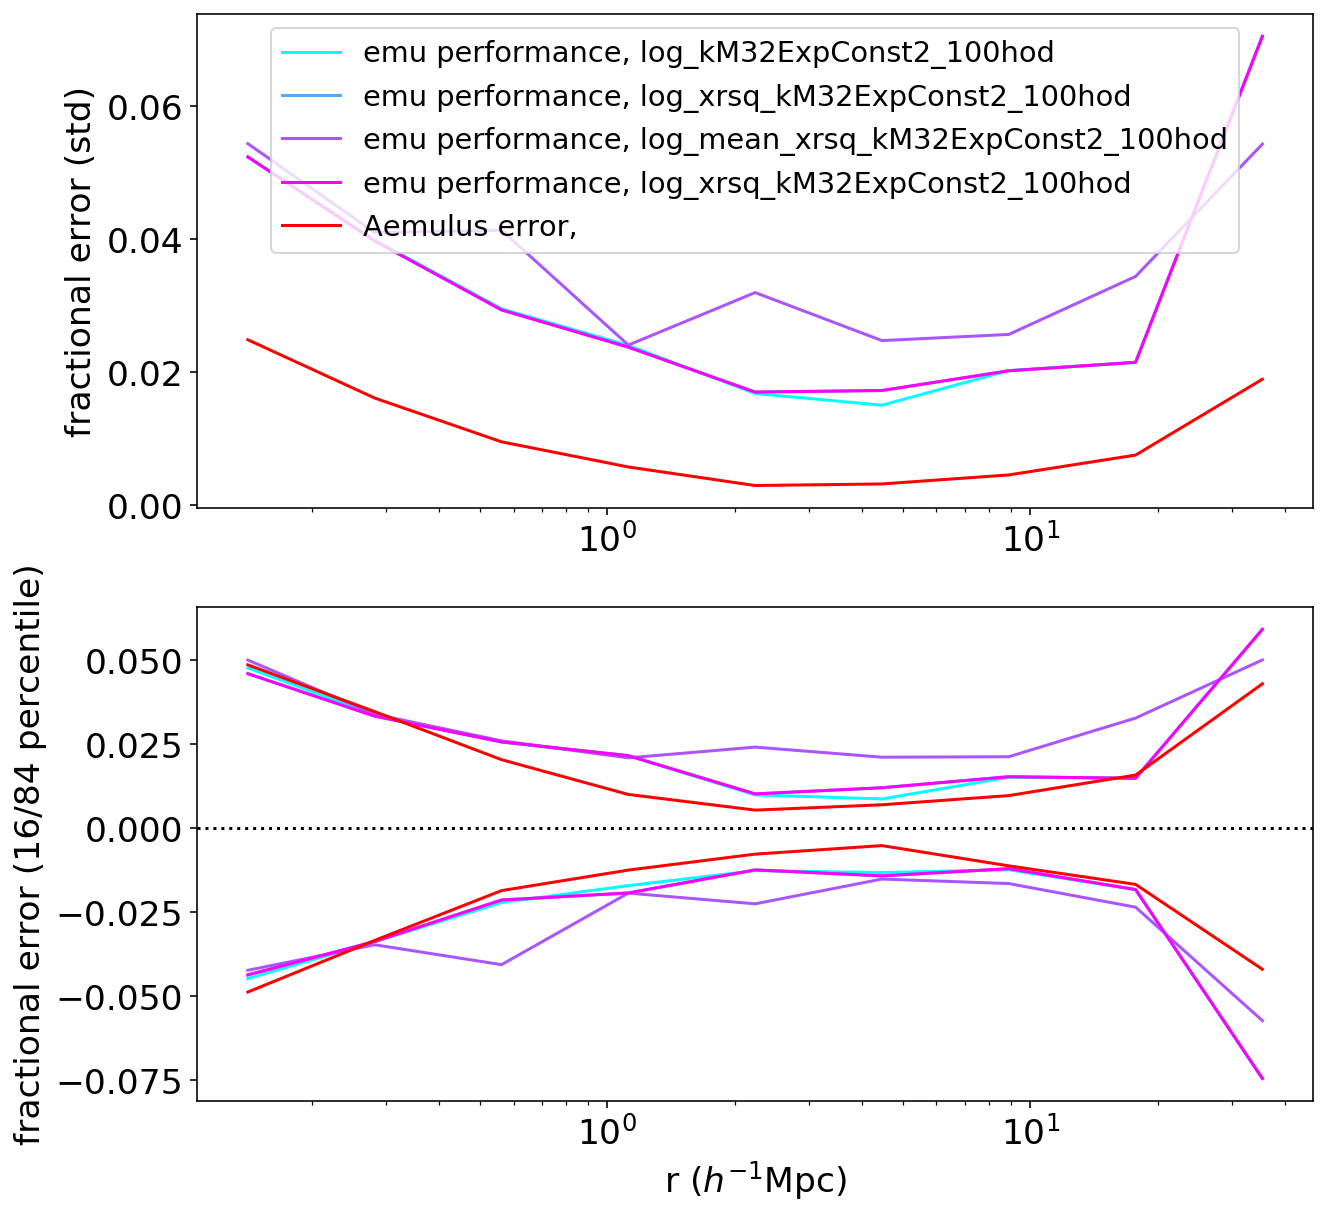

In [7]:
statistic='xi'

# tags = ['_log_kM32ExpConst2_100hod', '_log_xrsq_kM32ExpConst2_100hod', '_log_mean_xrsq_kM32ExpConst2_100hod',
#        '_mean_log_kM32ExpConst2_100hod', '_meansub_log_kM32ExpConst2_100hod',
#        '_mean_log_xrsq_kM32ExpConst2_100hod', '_meansub_log_xrsq_kM32ExpConst2_100hod']
tags = ['_log_kM32ExpConst2_100hod', 
        '_log_xrsq_kM32ExpConst2_100hod', 
        '_log_mean_xrsq_kM32ExpConst2_100hod',
        '_log_xrsq_kM32ExpConst2_100hod']
#         '_mean_log_kM32ExpConst2_100hod',
#         '_meansub_log_kM32ExpConst2_100hod',
#         '_mean_log_xrsq_kM32ExpConst2_100hod', 
#         '_meansub_log_xrsq_kM32ExpConst2_100hod']
savetag = ''
errtag = '_hod3_test0'
traintags = ['_nonolap']*len(tags)
testtags = ['_mean_test0']*len(tags)
labels = [f'emu performance, {s[1:]}' for s in tags]

acctags = []
for i in range(len(tags)):
    gptag = traintags[i] + errtag + tags[i]
    acctag = gptag + testtags[i]
    acctags.append(acctag)

plotter.compare_emulators(statistic, testtags, acctags, errtag, savetag, labels=labels)

In [ ]:
statistic='wp'

tags = ['_log_kM32ExpConst2_100hod', '_log_xrsq_kM32ExpConst2_100hod', '_log_mean_xrsq_kM32ExpConst2_100hod']
savetag = ''
errtag = '_hod3_test0'
traintags = ['_nonolap']*len(tags)
testtags = ['_mean_test0']*len(tags)
labels = [f'emu performance, {s[1:]}' for s in tags]

acctags = []
for i in range(len(tags)):
    gptag = traintags[i] + errtag + tags[i]
    acctag = gptag + testtags[i]
    acctags.append(acctag)

plotter.compare_emulators(statistic, testtags, acctags, errtag, savetag, labels=labels)